In [1]:
# import zipfile as zf
# files = zf.ZipFile("mpi_bitonic_cali.zip", 'r')
# files.extractall('MPI_test3')
# files.close()

In [2]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd
import math
import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [3]:
tk = th.Thicket.from_caliperreader(glob("mpi_bitonic_cali_for_graphs/*.cali"))

In [4]:
# Performance data
tk.dataframe

nid  \
node                                              profile           
{'name': 'main', 'type': 'function'}              69959949      1   
                                                  72285388      1   
                                                  74545541      1   
                                                  111778784     1   
                                                  120443041     1   
                                                  134421859     1   
                                                  141113086     1   
                                                  145695009     1   
                                                  146890920     1   
                                                  219753636     1   
                                                  251124617     1   
                                                  258443190     1   
                                                  299458413     1   
                                                  323440027     1   
                                                  348960282     1   
                                                  371797463     1   
                                                  372504311     1   
                                                  385860706     1   
                                                  406014852     1   
                                                  412798298     1   
                                                  425273050     1   
                                                  426347102     1   
                                                  431780120     1   
                                                  474983839     1   
                                                  495128266     1   
                                                  522218354     1   
                                                  545749135     1   
                                                  581114478     1   
                                                  589910256     1   
                                                  595963060     1   
                                                  617036696     1   
                                                  636767424     1   
                                                  681039842     1   
                                                  703322626     1   
                                                  704851166     1   
                                                  711973019     1   
                                                  730026020     1   
                                                  742997780     1   
                                                  757300741     1   
                                                  796646018     1   
                                                  843079097     1   
                                                  845428067     1   
                                                  855813289     1   
                                                  906215698     1   
                                                  979098051     1   
                                                  1008903827    1   
                                                  1037008638    1   
                                                  1075439831    1   
                                                  1077182474    1   
                                                  1079233601    1   
                                                  1118142111    1   
                                                  1156692466    1   
                                                  1176437503    1   
                                                  1181988965    1   
                                                  1205920931    1   
                                                  1215625551    1   
                                                  1226169108

In [5]:
tk.metadata

cali.caliper.version  mpi.world.size  \
profile                                           
69959949             2.11.0-dev            1024   
72285388             2.11.0-dev             256   
74545541             2.11.0-dev             128   
111778784            2.11.0-dev              64   
120443041            2.11.0-dev             512   
134421859            2.11.0-dev             128   
141113086            2.11.0-dev             512   
145695009            2.11.0-dev              64   
146890920            2.11.0-dev              64   
219753636            2.11.0-dev             128   
251124617            2.11.0-dev             128   
258443190            2.11.0-dev              64   
299458413            2.11.0-dev             256   
323440027            2.11.0-dev              64   
348960282            2.11.0-dev             256   
371797463            2.11.0-dev             256   
372504311            2.11.0-dev               2   
385860706            2.11.0-dev             256   
406014852            2.11.0-dev            1024   
412798298            2.11.0-dev             256   
425273050            2.11.0-dev            1024   
426347102            2.11.0-dev             128   
431780120            2.11.0-dev             512   
474983839            2.11.0-dev             128   
495128266            2.11.0-dev             256   
522218354            2.11.0-dev            1024   
545749135            2.11.0-dev             128   
581114478            2.11.0-dev            1024   
589910256            2.11.0-dev             128   
595963060            2.11.0-dev             256   
617036696            2.11.0-dev             128   
636767424            2.11.0-dev             256   
681039842            2.11.0-dev              64   
703322626            2.11.0-dev             512   
704851166            2.11.0-dev             128   
711973019            2.11.0-dev               2   
730026020            2.11.0-dev              64   
742997780            2.11.0-dev             128   
757300741            2.11.0-dev             256   
796646018            2.11.0-dev               2   
843079097            2.11.0-dev              64   
845428067            2.11.0-dev             128   
855813289            2.11.0-dev            1024   
906215698            2.11.0-dev             256   
979098051            2.11.0-dev             128   
1008903827           2.11.0-dev             512   
1037008638           2.11.0-dev             256   
1075439831           2.11.0-dev            1024   
1077182474           2.11.0-dev             256   
1079233601           2.11.0-dev            1024   
1118142111           2.11.0-dev              64   
1156692466           2.11.0-dev            1024   
1176437503           2.11.0-dev               2   
1181988965           2.11.0-dev               2   
1205920931           2.11.0-dev              64   
1215625551           2.11.0-dev             256   
1226169108           2.11.0-dev             256   
1228225926           2.11.0-dev               2   
1249753721           2.11.0-dev             256   
1302333012           2.11.0-dev               2   
1356977194           2.11.0-dev              64   
1380580251           2.11.0-dev            1024   
1387735916           2.11.0-dev              64   
1389926404           2.11.0-dev              64   
1402842485           2.11.0-dev              64   
1416534334           2.11.0-dev              64   
1441361478           2.11.0-dev             256   
1557318084           2.11.0-dev             256   
1559580121           2.11.0-dev             128   
1573415360           2.11.0-dev             512   
1580511471           2.11.0-dev             128   
1584133093           2.11.0-dev               2   
1613154510           2.11.0-dev             256   
1622857057           2.11.0-dev             512   
1732868322           2.11.0-dev             128   
1793748099           2.11.0-dev              64   
1812625885           2.11.0-dev  

In [6]:
# gb = tk.groupby("InputSize")
df = pd.merge(tk.dataframe, tk.metadata, left_on='profile', right_index=True)
df

nid  \
node                                              profile           
{'name': 'main', 'type': 'function'}              69959949      1   
{'name': 'comm', 'type': 'function'}              69959949      5   
{'name': 'comm_large', 'type': 'function'}        69959949      6   
{'name': 'MPI_Gather', 'type': 'function'}        69959949      7   
{'name': 'comp', 'type': 'function'}              69959949      3   
{'name': 'comp_large', 'type': 'function'}        69959949      4   
{'name': 'correctness_check', 'type': 'function'} 69959949      8   
{'name': 'data_init', 'type': 'function'}         69959949      2   
{'name': 'main', 'type': 'function'}              72285388      1   
{'name': 'comm', 'type': 'function'}              72285388      5   
{'name': 'comm_large', 'type': 'function'}        72285388      6   
{'name': 'MPI_Gather', 'type': 'function'}        72285388      7   
{'name': 'comp', 'type': 'function'}              72285388      3   
{'name': 'comp_large', 'type': 'function'}        72285388      4   
{'name': 'correctness_check', 'type': 'function'} 72285388      8   
{'name': 'data_init', 'type': 'function'}         72285388      2   
{'name': 'main', 'type': 'function'}              74545541      1   
{'name': 'comm', 'type': 'function'}              74545541      5   
{'name': 'comm_large', 'type': 'function'}        74545541      6   
{'name': 'MPI_Gather', 'type': 'function'}        74545541      7   
{'name': 'comp', 'type': 'function'}              74545541      3   
{'name': 'comp_large', 'type': 'function'}        74545541      4   
{'name': 'correctness_check', 'type': 'function'} 74545541      8   
{'name': 'data_init', 'type': 'function'}         74545541      2   
{'name': 'main', 'type': 'function'}              111778784     1   
{'name': 'comm', 'type': 'function'}              111778784     5   
{'name': 'comm_large', 'type': 'function'}        111778784     6   
{'name': 'MPI_Gather', 'type': 'function'}        111778784     7   
{'name': 'comp', 'type': 'function'}              111778784     3   
{'name': 'comp_large', 'type': 'function'}        111778784     4   
{'name': 'correctness_check', 'type': 'function'} 111778784     8   
{'name': 'data_init', 'type': 'function'}         111778784     2   
{'name': 'main', 'type': 'function'}              120443041     1   
{'name': 'comm', 'type': 'function'}              120443041     5   
{'name': 'comm_large', 'type': 'function'}        120443041     6   
{'name': 'MPI_Gather', 'type': 'function'}        120443041     7   
{'name': 'comp', 'type': 'function'}              120443041     3   
{'name': 'comp_large', 'type': 'function'}        120443041     4   
{'name': 'correctness_check', 'type': 'function'} 120443041     8   
{'name': 'data_init', 'type': 'function'}         120443041     2   
{'name': 'main', 'type': 'function'}              134421859     1   
{'name': 'comm', 'type': 'function'}              134421859     5   
{'name': 'comm_large', 'type': 'function'}        134421859     6   
{'name': 'MPI_Gather', 'type': 'function'}        134421859     7   
{'name': 'comp', 'type': 'function'}              134421859     3   
{'name': 'comp_large', 'type': 'function'}        134421859     4   
{'name': 'correctness_check', 'type': 'function'} 134421859     8   
{'name': 'data_init', 'type': 'function'}         134421859     2   
{'name': 'main', 'type': 'function'}              141113086     1   
{'name': 'comm', 'type': 'function'}              141113086     5   
{'name': 'comm_large', 'type': 'function'}        141113086     6   
{'name': 'MPI_Gather', 'type': 'function'}        141113086     7   
{'name': 'comp', 'type': 'function'}              141113086     3   
{'name': 'comp_large', 'type': 'function'}        141113086     4   
{'name': 'correctness_check', 'type': 'function'} 141113086     8   
{'name': 'data_init', 'type': 'function'}         141113086     2   
{'name': 'main', 'type': 'function'}              145695009 

In [7]:
# ctk = th.Thicket.concat_thickets(
#     thickets=list(gb.values()),
#     headers=list(gb.keys()),
#     axis="columns",
#     metadata_key="num_procs"
# )

In [8]:
# ctk.dataframe

In [9]:
# # Drop unwanted columns
# ctk.dataframe = ctk.dataframe.reset_index().drop(["nid", "spot.channel", "Min time/rank", "Max time/rank", "Avg time/rank", "Variance time/rank"], level=1, axis=1)
# ctk.dataframe = ctk.dataframe.drop(("node", ""), axis=1)

# # Rename index
# ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])

In [10]:
# ctk.dataframe

In [11]:
# # Define common variables
# function_names = set(ctk.dataframe.index.get_level_values("name"))
# threads = sorted(list(set(ctk.dataframe.index.get_level_values("num_procs"))))
# matrix_sizes = ctk.dataframe.columns.tolist()

In [12]:
# def plot_mpl(df, title, xlabel, ylabel):
#     fig = plt.figure()
#     ax = fig.add_subplot(1, 1, 1)
#     ax.plot(
#         df,
#         marker='o',
#     )
#     ax.set_title(title)
#     ax.set_xlabel(xlabel)
#     ax.set_ylabel(ylabel)
#     ax.legend(matrix_sizes)
#     plt.grid(True)
#     #plt.yscale("log", base=10)
#     plt.xscale("log", base=2)
#     plt.xticks(threads)
#     plt.show()
#     return fig, ax

In [13]:
# ctk.dataframe.loc["main"]

In [14]:
# for name in function_names:
#     plot_mpl(
#         df=ctk.dataframe.loc[name],
#         title=name,
#         xlabel="Threads",
#         ylabel="Time (seconds)",
#     )
#     #
#     #
#     #
    #

In [15]:
def plot_strong(df):
    for inputSize in [65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]:
        x = int(math.log2(inputSize))
        for region in ["main", "comp_large", "comm"]:
            plt.figure(figsize=(8, 5))

            plot_df = df[(df['InputSize'] == inputSize) & (df['name'] == region)]

            for inputType in plot_df['InputType'].unique():
                loop_df = plot_df[plot_df['InputType'] == inputType]
                
                group = loop_df.groupby('num_procs')['Avg time/rank'].mean()
                
                plt.plot(group, label=f'{inputType}')

            plt.title(f'Bitonic Sort, MPI: Strong scaling of \"{region}\" region with 2^{x} elements')
            plt.xlabel('Number of Processors')
            plt.ylabel('Time (seconds)')
#             plt.xticks([2, 4, 8, 16, 32, 64, 128, 256, 512, 1024], ['2', '4', '8', '16', '32', '64', '128', '256', '512', '1024'])
#             plt.yscale('log')
            plt.legend()
            plt.grid(True)
            plt.savefig("MPI_graphs_final/Strong/bitonicSortMPI" + "strong_" + region + "_" + str(inputSize))
            plt.show()


In [21]:
def plot_weak(df):
    for inputType in ["random", "sorted", "reverse_sorted", "1%perturbed"]:
        for region in ["main", "comp_large", "comm"]:
            plt.figure(figsize=(8, 5))
            
            plot_df = df[(df['InputType'] == inputType) & (df['name'] == region)]

            for inputSize in sorted(plot_df['InputSize'].unique()):
                x = int(math.log2(inputSize))
                
                loop_df = plot_df[plot_df['InputSize'] == inputSize]
                group = loop_df.groupby('num_procs')['Avg time/rank'].mean()
                
                plt.plot(group, label=f'2^{x} elements')
                
            plt.title(f'Bitonic Sort, MPI: Weak scaling of \"{region}\" region with \"{inputType}\" input type')
            plt.xlabel('Number of Processors')
            plt.ylabel('Time (seconds)')
            plt.xscale('log', base=2)

#             plt.xticks([2, 4, 8, 16, 32, 64, 128, 256, 512, 1024], ['2', '4', '8', '16', '32', '64', '128', '256', '512', '1024'])
#             plt.yscale('log')
            plt.legend()
            plt.grid(True)
            plt.savefig("MPI_graphs_final/Weak/bitonicSortMPI" + "weak_" + region + "_" + inputType)
            plt.show()

In [22]:
def plot_speedup(df):
    for inputType in ["random", "sorted", "reverse_sorted", "1%perturbed"]:
        for region in ["main", "comp_large", "comm"]:
            plt.figure(figsize=(8, 5))
            
            plot_df = df[(df['InputType'] == inputType) & (df['name'] == region)]

            for inputSize in sorted(plot_df['InputSize'].unique()):
                x = int(math.log2(inputSize))
                
                loop_df = plot_df[plot_df['InputSize'] == inputSize]
                
                baseline = loop_df[loop_df['num_procs'] == 2]['Avg time/rank'].mean()
            
                group = loop_df.groupby('num_procs')['Avg time/rank'].mean()
                group = baseline / group
                
                plt.plot(group, label=f'2^{x} elements')
                
            plt.title(f'Bitonic Sort, MPI: Speedup of \"{region}\" region with \"{inputType}\" input type')
            plt.xlabel('Number of Processors')
            plt.ylabel('Speedup')
            plt.xscale('log', base=2)

#             plt.xticks([2, 4, 8, 16, 32, 64, 128, 256, 512, 1024], ['2', '4', '8', '16', '32', '64', '128', '256', '512', '1024'])
#             plt.yscale('log')
            plt.legend()
            plt.grid(True)
            plt.savefig("MPI_graphs_final/SpeedUp/bitonicSortMPI" + "speedup_" + region + "_" + inputType)

            plt.show()

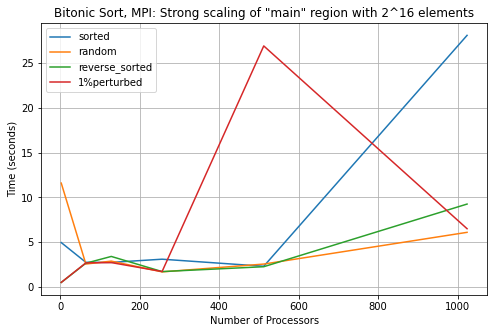

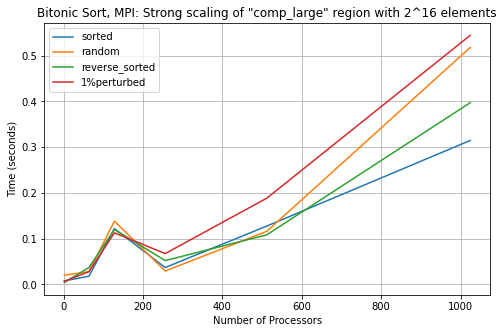

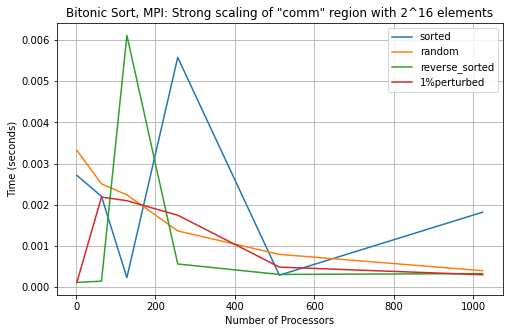

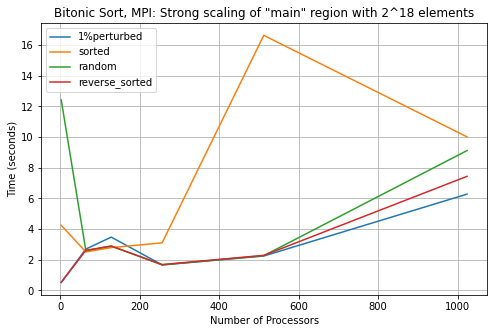

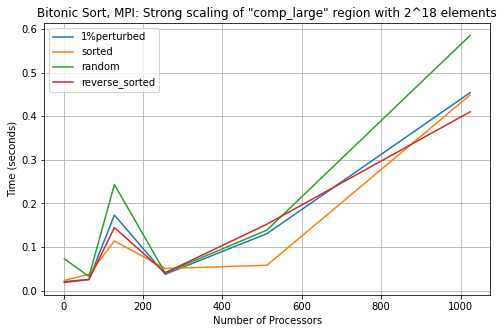

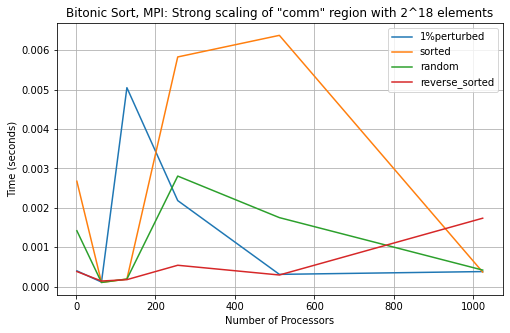

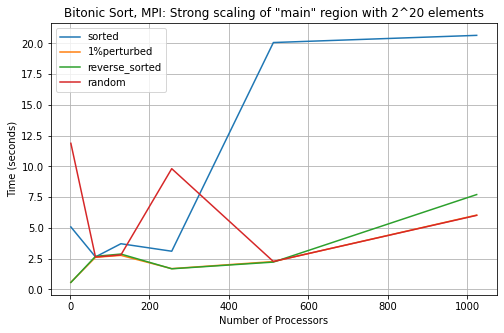

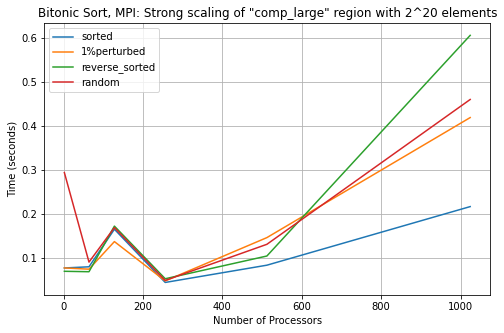

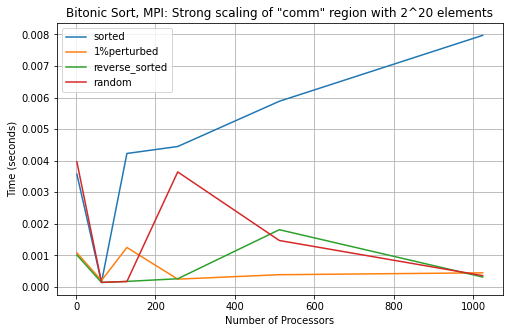

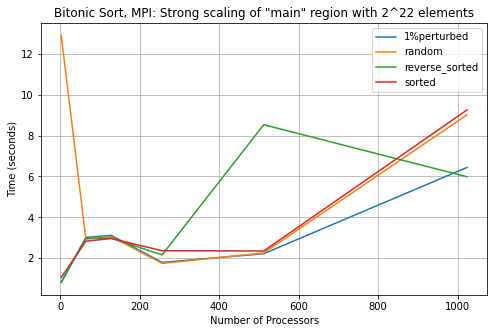

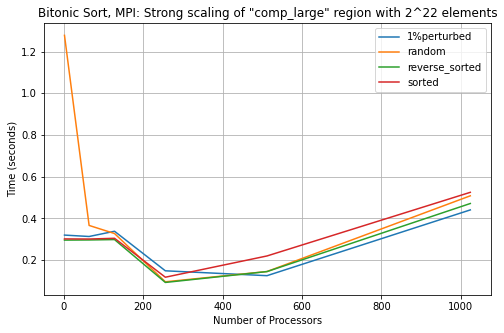

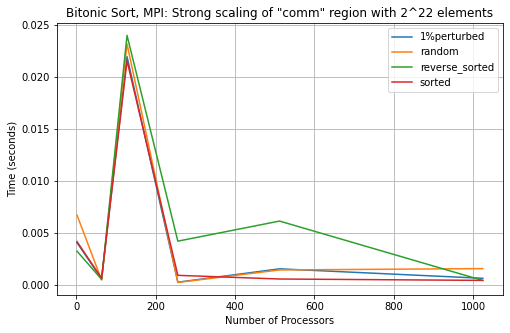

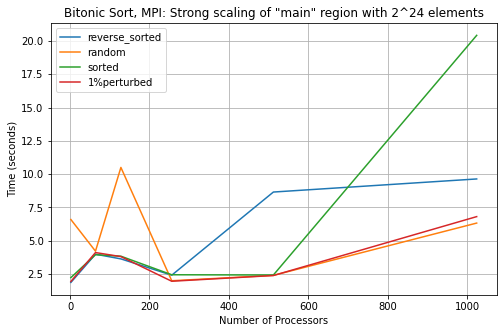

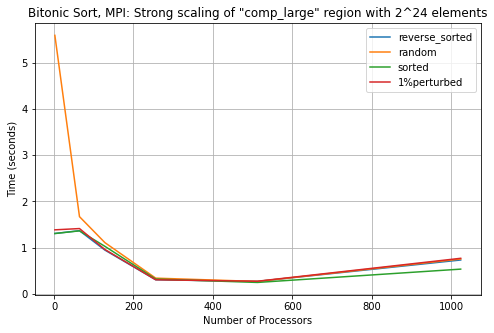

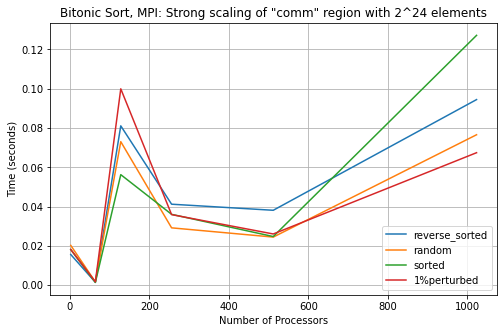

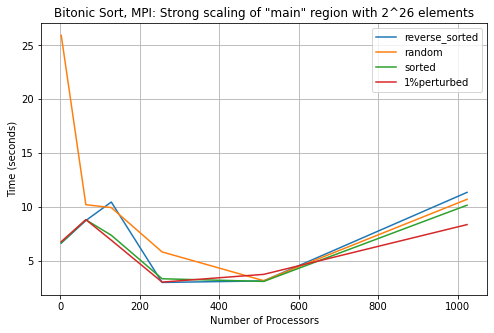

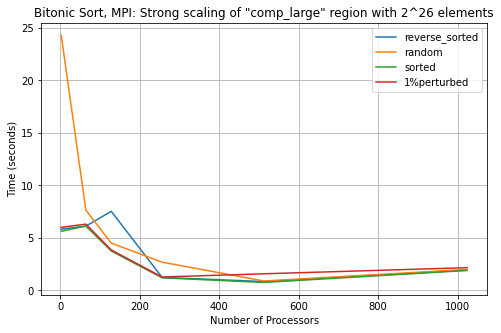

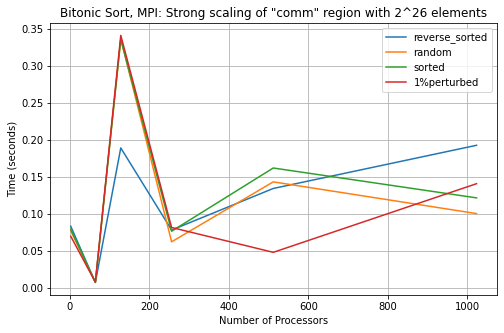

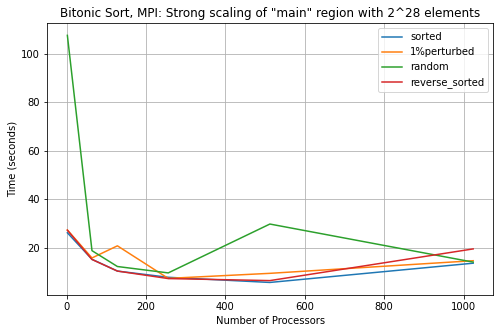

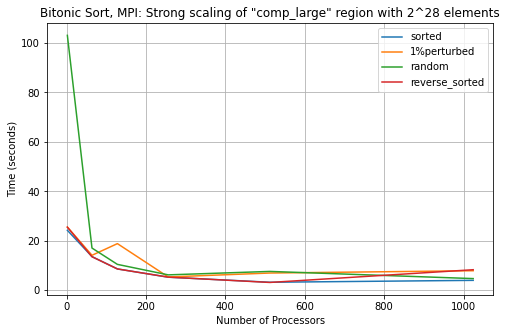

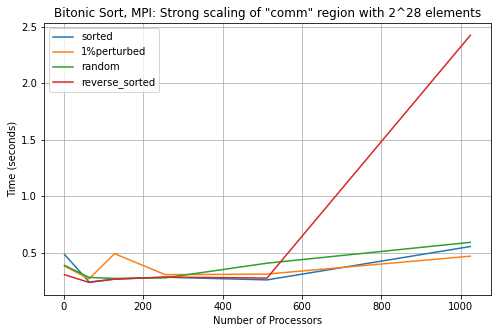

In [18]:
plot_strong(df)

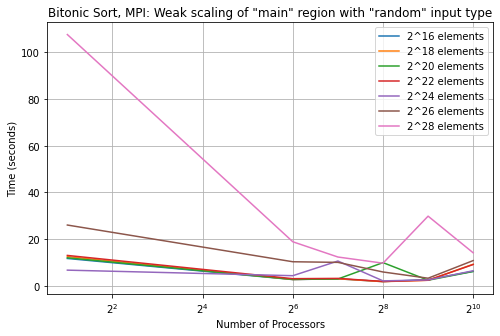

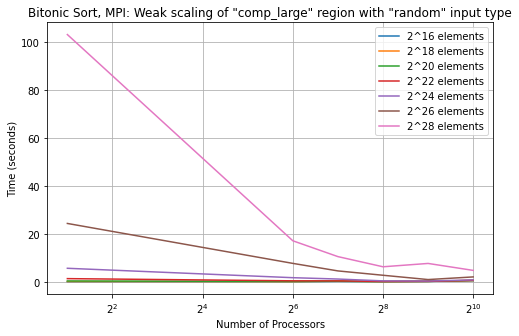

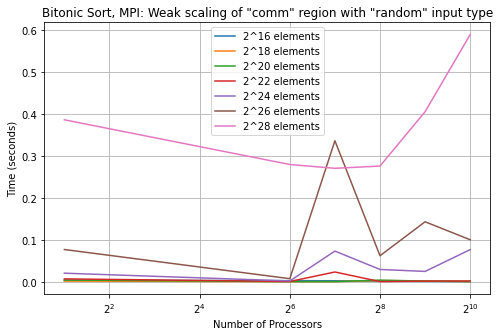

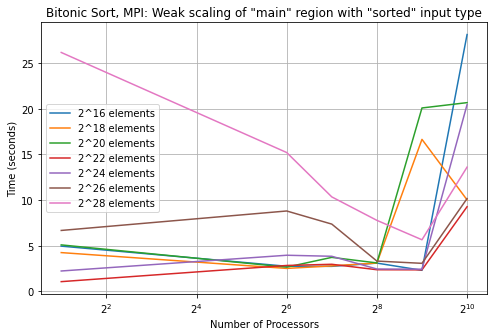

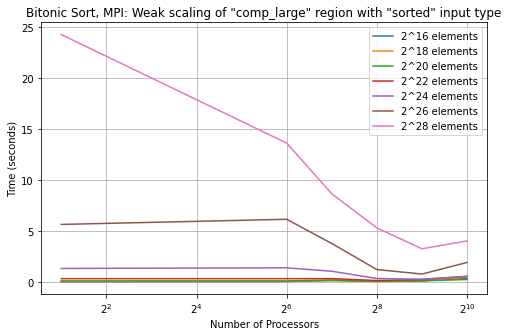

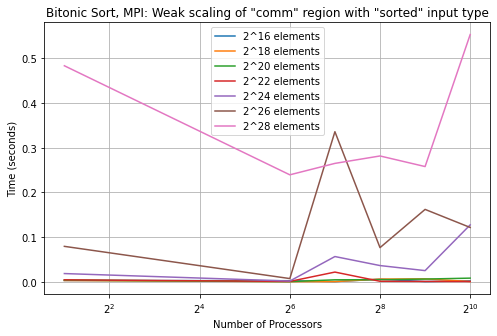

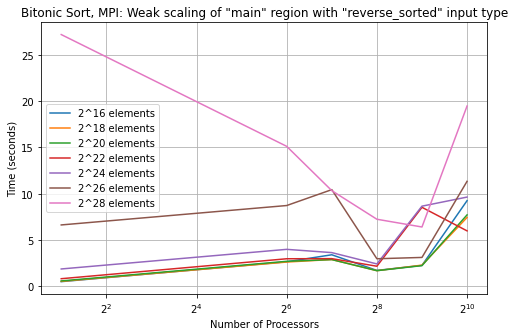

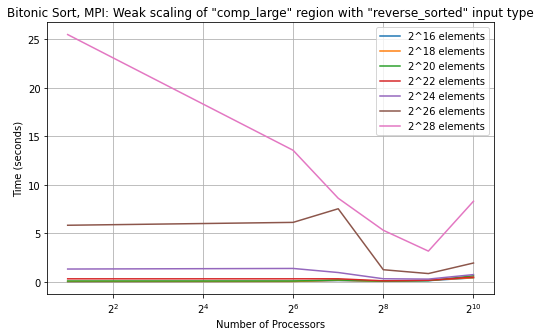

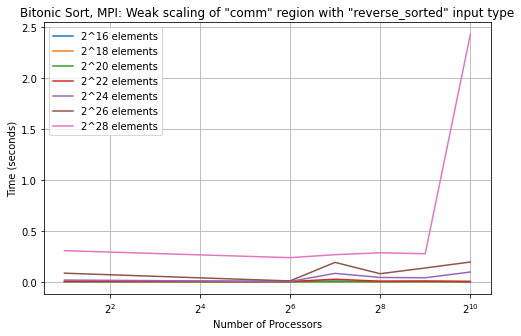

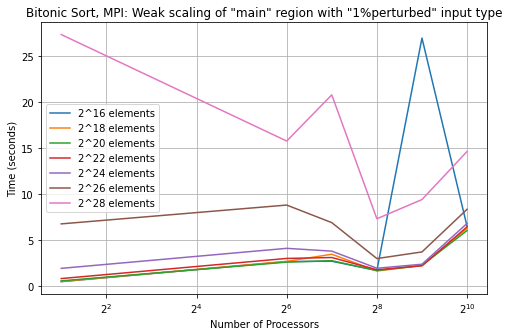

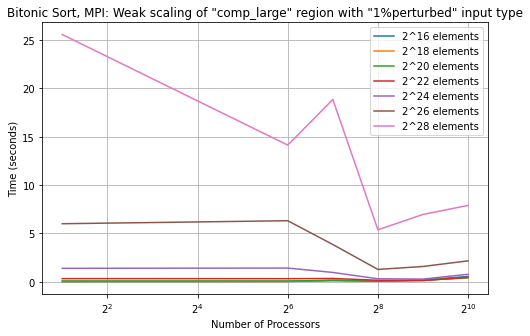

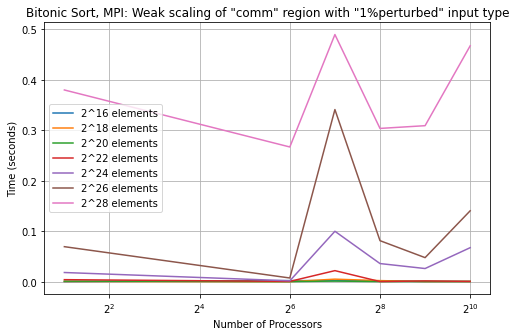

In [23]:
plot_weak(df)

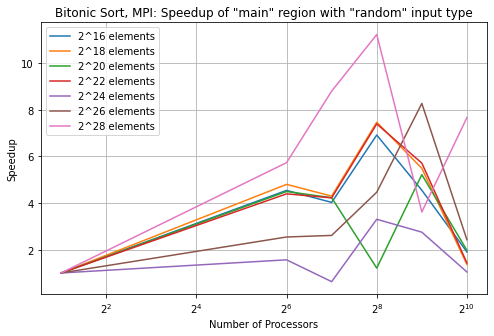

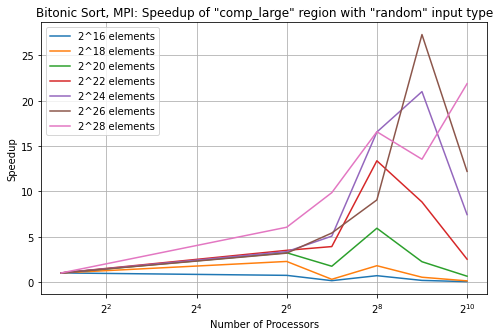

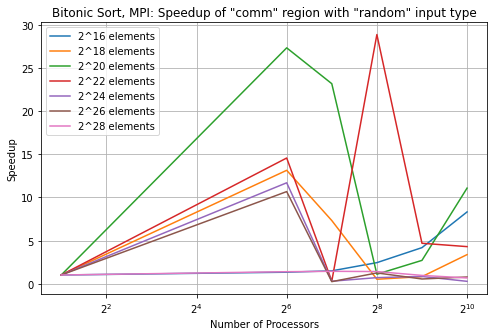

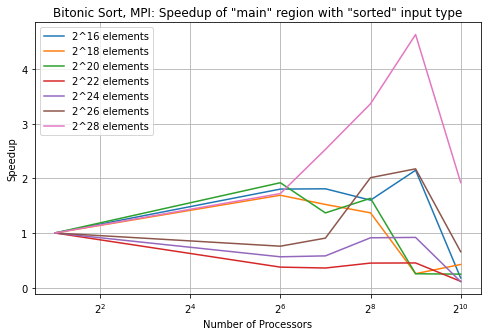

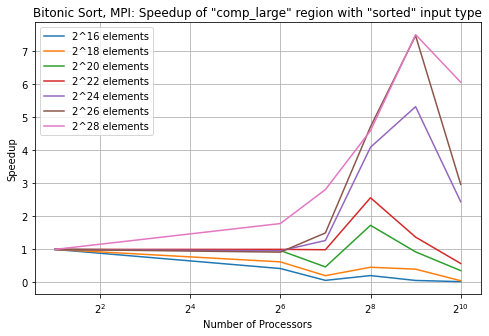

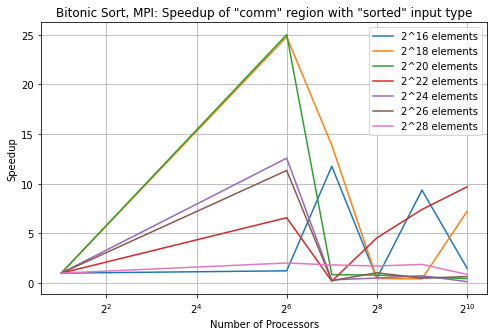

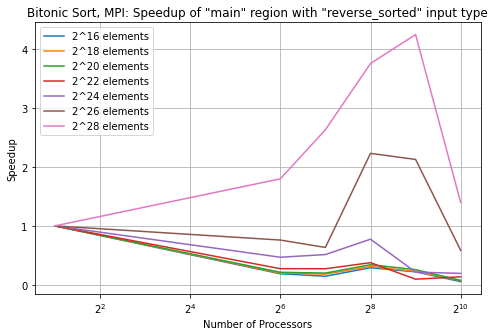

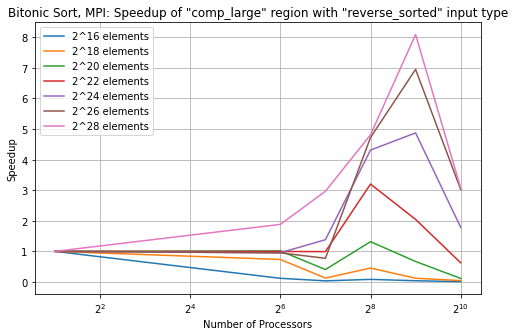

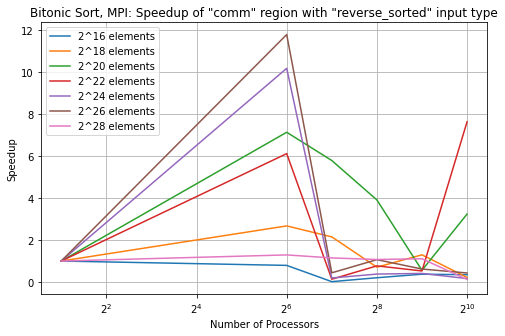

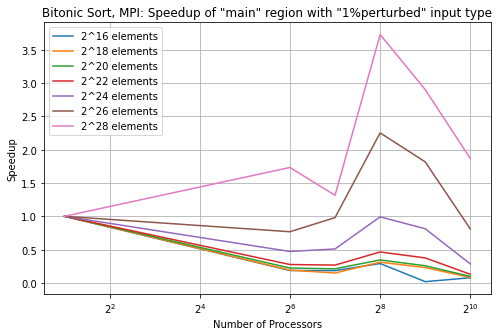

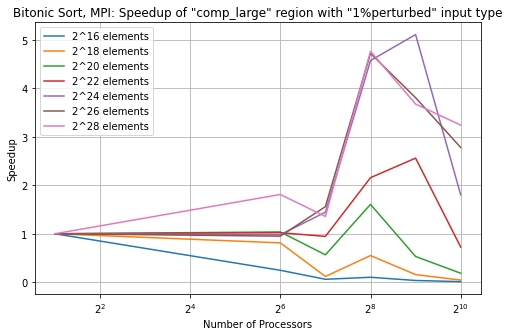

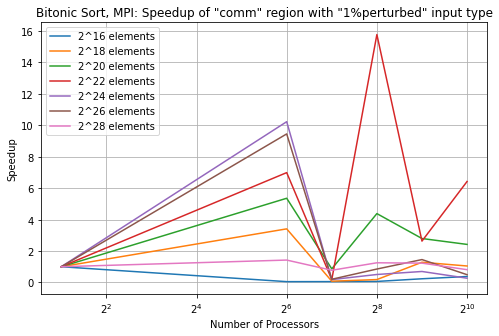

In [24]:
plot_speedup(df)